<a href="https://colab.research.google.com/github/MORIOMKAMAL/Computer-vision/blob/main/class_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


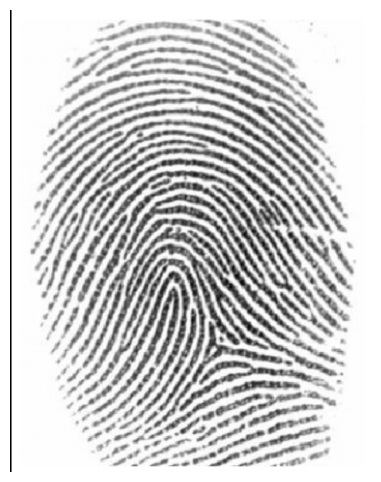

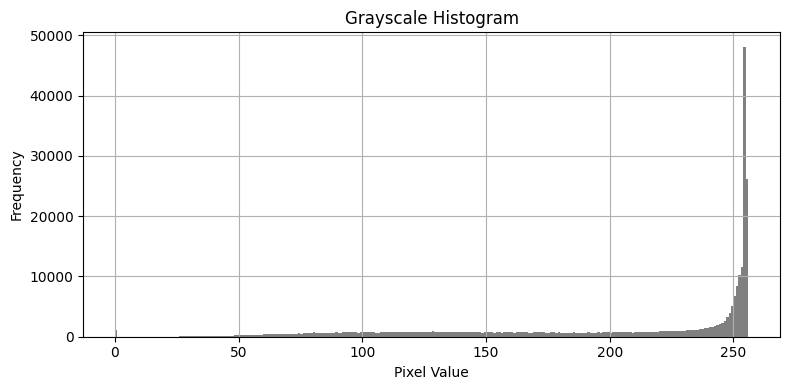

In [10]:
img1 = cv2.imread('/content/fingerprint.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('Tire.png', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(6, 6))
plt.imshow(img1, cmap='gray')
plt.axis('off')
plt.show()

# Plot histogram
plt.figure(figsize=(8, 4))
plt.title("Grayscale Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.hist(img1.ravel(), bins=256, range=(0, 256), color='gray')
plt.grid(True)
plt.tight_layout()
plt.show()

def show_comparison(original, processed, title, image_name):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(original, cmap='gray')
    plt.title(f"{image_name} - Original")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(processed, cmap='gray')
    plt.title(f"{image_name} - {title}")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

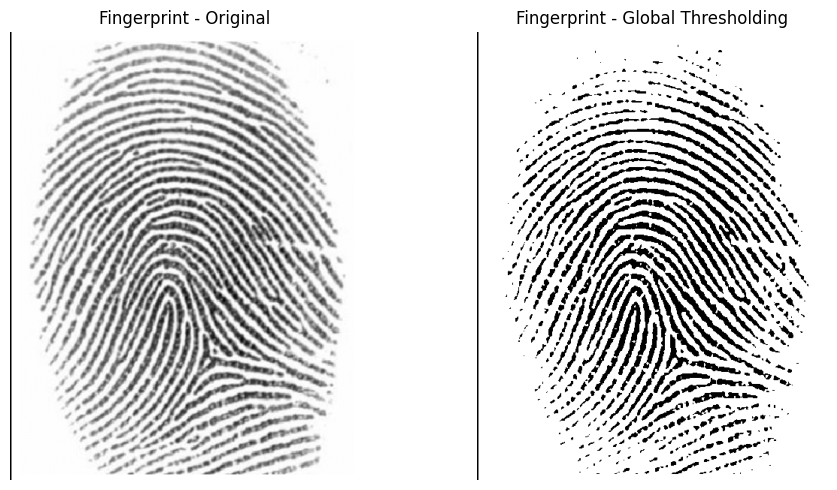

In [12]:
_, g_thresh1 = cv2.threshold(img1, 127, 255, cv2.THRESH_BINARY)
show_comparison(img1, g_thresh1, "Global Thresholding", "Fingerprint")




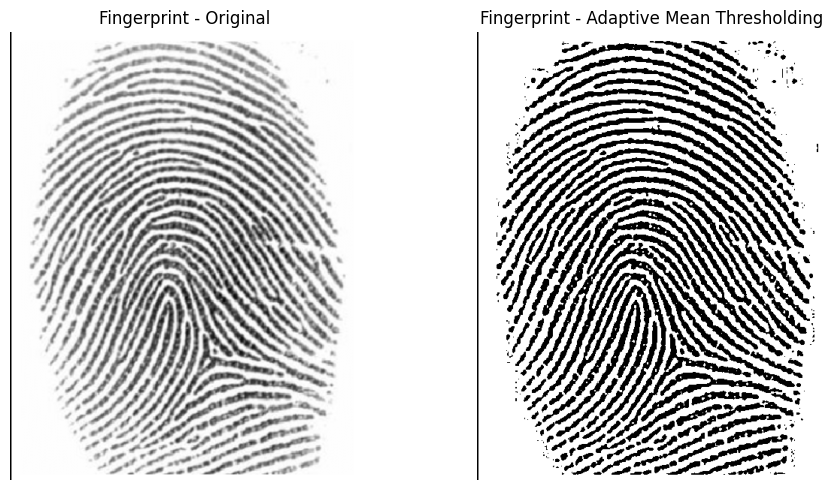

In [14]:
a_mean1 = cv2.adaptiveThreshold(img1, 255,
                                cv2.ADAPTIVE_THRESH_MEAN_C,
                                cv2.THRESH_BINARY, 11, 2)
show_comparison(img1, a_mean1, "Adaptive Mean Thresholding", "Fingerprint")

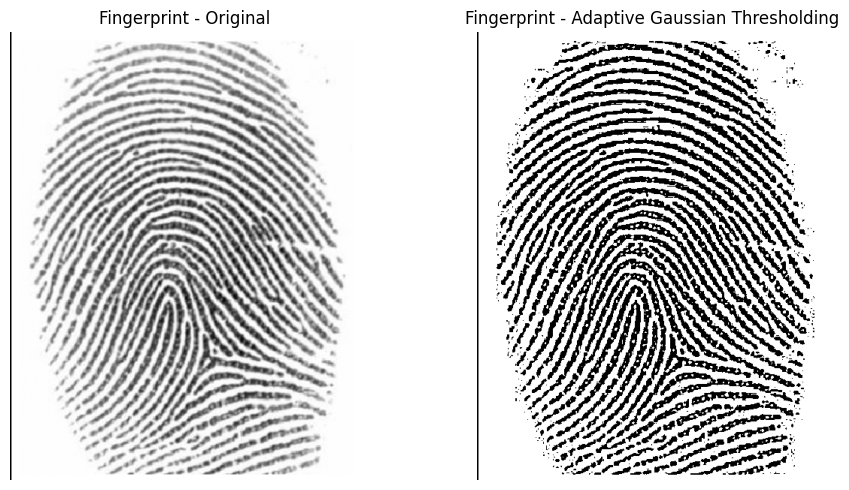

In [16]:
a_gauss1 = cv2.adaptiveThreshold(img1, 255,
                                 cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                 cv2.THRESH_BINARY, 11, 2)
show_comparison(img1, a_gauss1, "Adaptive Gaussian Thresholding", "Fingerprint")

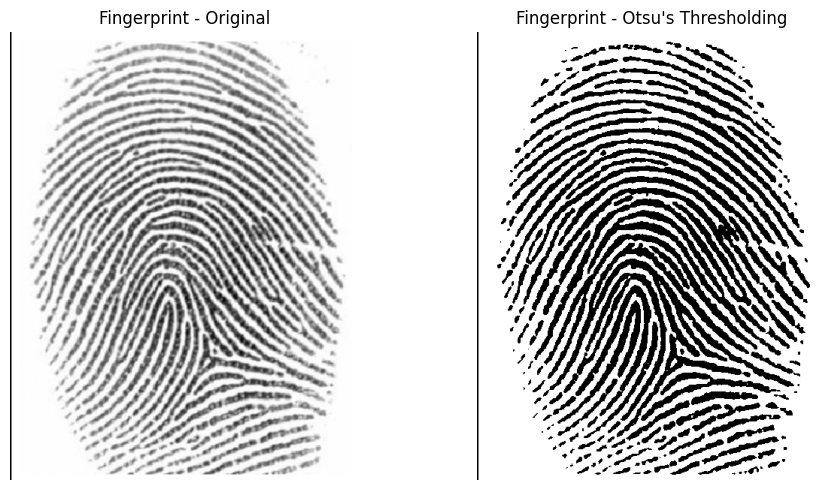

In [18]:
_, otsu1 = cv2.threshold(img1, 0, 255,
                         cv2.THRESH_BINARY + cv2.THRESH_OTSU)
show_comparison(img1, otsu1, "Otsu's Thresholding", "Fingerprint")

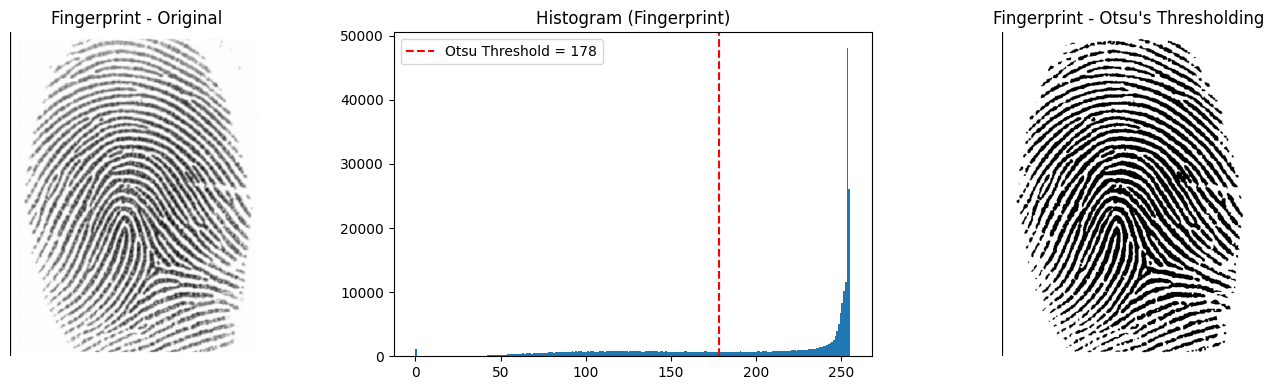

In [19]:
otsu_val1, otsu1 = cv2.threshold(img1, 0, 255,
                                 cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Plot original, histogram, and thresholded image
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.imshow(img1, cmap='gray')
plt.title("Fingerprint - Original")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.hist(img1.ravel(), 256)
plt.axvline(x=otsu_val1, color='r', linestyle='--', label=f"Otsu Threshold = {otsu_val1:.0f}")
plt.title("Histogram (Fingerprint)")
plt.legend()

plt.subplot(1, 3, 3)
plt.imshow(otsu1, cmap='gray')
plt.title("Fingerprint - Otsu's Thresholding")
plt.axis('off')

plt.tight_layout()
plt.show()